# Day 25

In [55]:
from patsy import dmatrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# R 스타일 모형 정의

StatsModels 패키지는 통계분석과 관련된 R의 기능을 파이썬으로 옮겨오기 위한 패키지이다. R에는 데이터프레임과 문자열 기호를 이용하여 회귀모형을 정의하는 방법이 존재한다. StatsModels 패키지도 이러한 R 스타일 모형 정의 방법을 지원한다. 이러한 지원을 가능하게 하는 것은 patsy라는 패키지 덕분이다. 여기에서는 patsy 패키지의 간단한 사용법과 이를 이용하여 StatsModels에서 회귀 모형을 정의하는 방법을 설명한다.

## patsy 패키지 소개

patsy 패키지는 회귀분석 전처리를 위한 패키지로 데이터프레임을 가공하여 인코딩, 변환 등을 쉽게 해주는 기능을 제공한다.

patsy 패키지의 `dmatrix`라는 명령을 사용하면 실험설계행렬(experiment design matrix)을 간단히 만들수 있다. `dmatrix`에 다음과 같이 모형 정의 문자열 `formula`와 원데이터 `data`을 입력하면 `formula`에서 지정한 대로 변환된 데이터 `data_transformed`를 출력한다. 

```
data_transformed = dmatrix(formula, data)
```

예제를 위해 다음과 같이 데이터 `x1`, `x2`를 만들자.

In [6]:
np.random.seed(0)
x1 = np.random.rand(5) + 10
x2 = np.random.rand(5) * 10
y = x1 + 2 * x2 + np.random.randn(5)
df1 = pd.DataFrame(x1, columns=["x1"])
df2 = pd.DataFrame(np.array([x1, x2]).T, columns=["x1", "x2"])
df = pd.DataFrame(np.array([x1, x2, y]).T, columns=["x1", "x2", "y"])

In [7]:
df1

,x1
0,10.548814
1,10.715189
2,10.602763
3,10.544883
4,10.423655


In [8]:
df2

,x1,x2
0,10.548814,6.458941
1,10.715189,4.375872
2,10.602763,8.917730
3,10.544883,9.636628
4,10.423655,3.834415


In [9]:
df

,x1,x2,y
0,10.548814,6.458941,23.610739
1,10.715189,4.375872,20.921207
2,10.602763,8.917730,29.199261
3,10.544883,9.636628,29.939813
4,10.423655,3.834415,18.536348


`dmatrix`의 첫번째 기능은 자동 오그멘테이션이다. 대상이 되는 데이터에 자동으로 Intecept라는 이름의 컬럼을 추가한다. 

다음 예제에서 스타일 문자열은 단순히 `"x1"`이다. 스타일 문자열은 데이터와 연산자로 이루어지는데 데이터는 변수명 혹은 데이터프레임 컬럼 라벨로 지정한다. 변수명으로 지정하는 경우에는 현재의 이름 공간(name space)에서 변수를 찾고 데이터프레임 컬럼 라벨을 지정하는 경우에는 `data`라는 인수에 데이터프레임을 넣어주어야 한다.

In [12]:
dmatrix("x1")

DesignMatrix with shape (5, 2)
  Intercept        x1
          1  10.54881
          1  10.71519
          1  10.60276
          1  10.54488
          1  10.42365
  Terms:
    'Intercept' (column 0)
    'x1' (column 1)

In [13]:
dmatrix("x1", df1)

DesignMatrix with shape (5, 2)
  Intercept        x1
          1  10.54881
          1  10.71519
          1  10.60276
          1  10.54488
          1  10.42365
  Terms:
    'Intercept' (column 0)
    'x1' (column 1)

## R-style formula 연산자

모형정의 연산자 `formula`에 복수의 데이터를 지정하는 경우에는 다음과 같은 연산자를 포함해야 한다.

| 기호 | 설명 |
|-|-|
|`+`| 설명 변수 추가 |
|`-`| 설명 변수 제거 |
|1, 0| intercept. (제거시 사용) |
|`:`| interaction (곱) |
|`*`| `a*b = a + b + a:b` |
|`/`| `a/b = a + a:b` |
|`~`| 종속 - 독립 관계 |

상수항을 제외하고자 하는 경우에는 `- 1` 또는 `+ 0`을 써주어야 한다.

In [14]:
dmatrix("x1 - 1")

DesignMatrix with shape (5, 1)
        x1
  10.54881
  10.71519
  10.60276
  10.54488
  10.42365
  Terms:
    'x1' (column 0)

In [15]:
dmatrix("x1 + 0")

DesignMatrix with shape (5, 1)
        x1
  10.54881
  10.71519
  10.60276
  10.54488
  10.42365
  Terms:
    'x1' (column 0)

In [16]:
dmatrix("x1 + x2")

DesignMatrix with shape (5, 3)
  Intercept        x1       x2
          1  10.54881  6.45894
          1  10.71519  4.37587
          1  10.60276  8.91773
          1  10.54488  9.63663
          1  10.42365  3.83442
  Terms:
    'Intercept' (column 0)
    'x1' (column 1)
    'x2' (column 2)

In [22]:
dmatrix("x1 + x2 - 1")

DesignMatrix with shape (5, 2)
        x1       x2
  10.54881  6.45894
  10.71519  4.37587
  10.60276  8.91773
  10.54488  9.63663
  10.42365  3.83442
  Terms:
    'x1' (column 0)
    'x2' (column 1)

In [18]:
dmatrix("x1 + x2 - 1", data=df2)

DesignMatrix with shape (5, 2)
        x1       x2
  10.54881  6.45894
  10.71519  4.37587
  10.60276  8.91773
  10.54488  9.63663
  10.42365  3.83442
  Terms:
    'x1' (column 0)
    'x2' (column 1)

두 변수의 곱을 새로운 변수로 추가하려면 `:` 연산자를 사용한다.

In [23]:
dmatrix("x1 + x2 + x1:x2 - 1")

DesignMatrix with shape (5, 3)
        x1       x2      x1:x2
  10.54881  6.45894   68.13417
  10.71519  4.37587   46.88830
  10.60276  8.91773   94.55258
  10.54488  9.63663  101.61711
  10.42365  3.83442   39.96862
  Terms:
    'x1' (column 0)
    'x2' (column 1)
    'x1:x2' (column 2)

interaction이라고 하며 비선형적인 효과를 잡아주기 위해 변수의 곱을 넣어야 할 때가 있는데 이 때 사용한다.

위 식은 다음과 같이 `*` 연산자로 간단하게 나타낼 수도 있다.

In [24]:
dmatrix("x1 * x2 - 1")

DesignMatrix with shape (5, 3)
        x1       x2      x1:x2
  10.54881  6.45894   68.13417
  10.71519  4.37587   46.88830
  10.60276  8.91773   94.55258
  10.54488  9.63663  101.61711
  10.42365  3.83442   39.96862
  Terms:
    'x1' (column 0)
    'x2' (column 1)
    'x1:x2' (column 2)

`/` 연산자는 다음과 같은 출력을 낸다.

In [25]:
dmatrix("x1 / x2 - 1")

DesignMatrix with shape (5, 2)
        x1      x1:x2
  10.54881   68.13417
  10.71519   46.88830
  10.60276   94.55258
  10.54488  101.61711
  10.42365   39.96862
  Terms:
    'x1' (column 0)
    'x1:x2' (column 1)

## 변환

`dmatrix`에서는 일반적인 수학 변환(transform)도 가능하다. numpy 함수 뿐 아니라 사용자 정의 함수와 다음과 같은 patsy 전용 함수도 사용할 수 있다. 

* `center(x)`: 평균 제거
* `standardize(x)`: 평균 제거 및 표준편차로 스케일링
* `scale(x)`: `standardize(x)` 과 같음 


In [26]:
dmatrix("x1 + np.log(np.abs(x2))", data=df2)

DesignMatrix with shape (5, 3)
  Intercept        x1  np.log(np.abs(x2))
          1  10.54881             1.86547
          1  10.71519             1.47611
          1  10.60276             2.18804
          1  10.54488             2.26557
          1  10.42365             1.34402
  Terms:
    'Intercept' (column 0)
    'x1' (column 1)
    'np.log(np.abs(x2))' (column 2)

In [27]:
def doubleit(x):
    return 2 * x

dmatrix("doubleit(x1)", data=df1)

DesignMatrix with shape (5, 2)
  Intercept  doubleit(x1)
          1      21.09763
          1      21.43038
          1      21.20553
          1      21.08977
          1      20.84731
  Terms:
    'Intercept' (column 0)
    'doubleit(x1)' (column 1)

In [28]:
dmatrix("center(x1) + standardize(x1) + scale(x2)", data=df2)

DesignMatrix with shape (5, 4)
  Intercept  center(x1)  standardize(x1)  scale(x2)
          1    -0.01825         -0.19319   -0.07965
          1     0.14813          1.56828   -0.97279
          1     0.03570          0.37799    0.97458
          1    -0.02218         -0.23480    1.28282
          1    -0.14341         -1.51828   -1.20495
  Terms:
    'Intercept' (column 0)
    'center(x1)' (column 1)
    'standardize(x1)' (column 2)
    'scale(x2)' (column 3)

## 변수 보호
 
함수를 사용한 변수 변환 이외에도 모형 정의 문자열 자체내에 연산기호를 넣어 연산한 값을 만드는 것도 가능하다. 이 때에는 모형정의 연산자와 혼동되지 않도록  `I()` 연산자를 추가해야 한다.
 

dmatrix("I(x1 + x2)", data=df2)

이 값을 다음 식과 비교하면  `I()`의 기능을 확실히 알 수 있다. 

In [29]:
dmatrix("x1 + x2", data=df2)

DesignMatrix with shape (5, 3)
  Intercept        x1       x2
          1  10.54881  6.45894
          1  10.71519  4.37587
          1  10.60276  8.91773
          1  10.54488  9.63663
          1  10.42365  3.83442
  Terms:
    'Intercept' (column 0)
    'x1' (column 1)
    'x2' (column 2)

## 다항선형회귀 

`I()` 연산자를 활용하면 다항선형회귀(polynomial regression)도 할 수 있다.

In [30]:
dmatrix("x1 + I(x1**2) + I(x1**3) + I(x1**4)", data=df1)

DesignMatrix with shape (5, 5)
  Intercept        x1  I(x1 ** 2)  I(x1 ** 3)   I(x1 ** 4)
          1  10.54881   111.27747  1173.84524  12382.67452
          1  10.71519   114.81528  1230.26750  13182.54925
          1  10.60276   112.41859  1191.94772  12637.93965
          1  10.54488   111.19456  1172.53366  12364.23047
          1  10.42365   108.65258  1132.55698  11805.38301
  Terms:
    'Intercept' (column 0)
    'x1' (column 1)
    'I(x1 ** 2)' (column 2)
    'I(x1 ** 3)' (column 3)
    'I(x1 ** 4)' (column 4)

## 카테고리 변수 인코딩

데이터로 문자열이 오는 경우에는 카테고리 값으로 인정하여 One-Hot-Encoding 방식의 인코딩을 하게 된다.

In [31]:
df3 = pd.DataFrame(["A", "B", "A", "C"], columns=["x3"])
df3

,x3
0,A
1,B
2,A
3,C


In [32]:
dmatrix("x3 - 1", data=df3)

DesignMatrix with shape (4, 3)
  x3[A]  x3[B]  x3[C]
      1      0      0
      0      1      0
      1      0      0
      0      0      1
  Terms:
    'x3' (columns 0:3)

카테고리 값이지만 정수 등으로 표시된 경우에는 C() 연산자를 이용하여 카테고리 값임을 지정할 수 있다.

In [33]:
df4 = pd.DataFrame([1, 1, 4, 2], columns=["x4"])
df4

,x4
0,1
1,1
2,4
3,2


In [34]:
dmatrix("C(x4) + 0", data=df4)

DesignMatrix with shape (4, 3)
  C(x4)[1]  C(x4)[2]  C(x4)[4]
         1         0         0
         1         0         0
         0         0         1
         0         1         0
  Terms:
    'C(x4)' (columns 0:3)

## `OLS.from_formula` 메서드

선형회귀분석을 위한 `OLS` 클래스에는 모형 정의 문자열을 사용할 수 있는 `from_formula`라는 메서드가 있다. 이 메서드를 쓰면 사용자가 데이터 행렬을 직접 정의하지 않고 모형 정의 문자열만으로 선형회귀모형을 만드는 것이 가능하다.

예를 들어 df가 다음과 같은 경우,

In [35]:
df

,x1,x2,y
0,10.548814,6.458941,23.610739
1,10.715189,4.375872,20.921207
2,10.602763,8.917730,29.199261
3,10.544883,9.636628,29.939813
4,10.423655,3.834415,18.536348


In [50]:
# 직접 데이터 행렬을 만드는  statsmodels.tools.tools as sm
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant
dfy = df.iloc[:, -1]
dfX = add_constant(df.iloc[:, :-1])
model1 = OLS(dfy, dfX)

# 모형 정의 문자열을 사용하는 경우
model2 = OLS.from_formula("y ~ x1 + x2", data=df)

# 입력변수가 카테고리값인 경우

회귀 분석 대상이 되는 독립 변수가 카테고리 값을 가지는 변수인 경우에는 카테고리 값에 의해 연속 변수인 y값이 달라진다. 이러한 경우, 분산 분석(ANOVA)을 사용하면 카테고리 값의 영향을 정량적으로 분석할 수 있다. 또한 이는 카테고리 값에 의해 회귀 모형이 달라지는 것으로도 볼 수 있기 때문에 모형 비교에도 사용될 수 있다.

## 카테고리 독립 변수와 더미 변수

카테고리 값은 여러개의 다른 상태를 나타내는 값이다. 분석시에는 편의상 이 값은 0, 1과 같은 정수로 표현하지만 원래 카테고리값은 1, 2, 3과 같이 숫자로 표현되어 있어도 이는 단지 "A", "B", "C"라는 라벨을 숫자로 대신 쓴 것에 지나지 않으며 실제로 크기의 의미가 없다는 점에 주의해야 한다. 즉, 2라는 값이 1보다 2배 더 크다는 뜻이 아니고 3이라는 값도 1보다 3배 더 크다는 뜻이 아니다.

따라서 카테고리 값을 그냥 정수로 쓰면  회귀 분석 모형은 이 값을 크기를 가진 숫자로 인식할 수 있는 위험이 있기 때문에 0과 1 두 가지 값만 가지는 더미 변수(dummy variable)의 형태로 변환하여 회귀 분석을 한다.

더미 변수는 0 또는 1만으로 표현되는 값으로 어떤 요인이 존재하는가 존재하지 않는가를 표시하는 독립 변수이다. 다음과 같은 명칭으로도 불린다.

* indicator variable
* design variable
* Boolean indicator
* binary variable
* treatment

카테고리 변수를 더미 변수로 만들 때는 보통 One-Hot-Encoding 방법을 쓴다. 이 방법을 사용하는 경우, 하나의 카테고리 값은 하나의 더미 변수가 된다.

## 더미 변수와 복수 모형

더미 변수를 사용하면 카테고리 변수의 값에 따라 나누어진 여러 그룹의 데이터에 대해 각각 회귀 모형을 사용하는 것과 같다. 다만 이  회귀 모형들은 더미 변수의 사용 방법에 따라 공통 모수를 가진다.  

### 더미 변수의 예 1

$A, B, C$ 세개의 카테고리 값을 가지는 변수 $x_1$은 다음과 같이  $d_1$, $d_2$, $d_3$ 라는 더미 변수로 표현할 수 있다.

* $x_1 = A$ 이면  $d_1 = 1, d_2 = 0, d_3 = 0$
* $x_1 = B$ 이면  $d_1 = 0, d_2 = 1, d_3 = 0$
* $x_1 = C$ 이면  $d_1 = 0, d_2 = 0, d_3 = 1$

더미 변수를 사용하면 선형 회귀 모형은 다음과 같다.
$$ y = w_1 d_1 + w_2 d_2 + w_3 d_3  $$

더미 변수의 값을 대입하면

* $x_1 = A$, 즉, $d_1 = 1, d_2 = 0, d_3 = 0$ 이면 $ y = w_1 = w_{A} $
* $x_1 = B$, 즉, $d_1 = 0, d_2 = 1, d_3 = 0$ 이면 $ y = w_2 = w_{B} $
* $x_1 = C$, 즉, $d_1 = 0, d_2 = 0, d_3 = 1$ 이면 $ y = w_3 = w_{C} $

이므로 사실상 3개의 독립적인 0차 모형과 같다.

위에서 사용한 모형에는 **상수항이 없다**는 사실에 유의하라. One-Hot-Encoding된 더미 변수를 사용하는 경우에는 상수항을 사용하면 그룹의 수보다 모수의 수가 많아지므로 추정이 불가능하다. 

만약 상수항을 넣고 싶다면 더미 변수의 수를 하나 줄이고 클래스 중 하나를 모든 더미 변수가 0인 경우로 보아야 한다.

$$ y = w_0 + w_1 d_1 + w_2 d_2 $$

* $x_1 = A$ 이면  $d_1 = 0, d_2 = 0$
* $x_1 = B$ 이면  $d_1 = 1, d_2 = 0$
* $x_1 = C$ 이면  $d_1 = 0, d_2 = 1$

더미 변수의 값을 대입하면

* $x_1 = A$ 이면 $ y = w_0 = w_{A} $
* $x_1 = B$ 이면 $ y = w_0 + w_1 = w_{B} $
* $x_1 = C$ 이면 $ y = w_0 + w_2 = w_{C} $

StatsModels에서는 카테고리 변수와 상수항이 동시에 존재하면 자동으로 이렇게 지정한다.

### 더미 변수의 예 2

이번에는 카테고리 변수 $x_1$과 실수 변수 $x_2$를 동시에 가지는 모형을 생각하자. 
이 모형은 더미 변수를 사용하여 다음과 같이 표현할 수 있다.

$$ y = w_1 d_1 + w_2 d_2 + w_3 d_3 + w_4 x_2 $$

* $x_1 = A$, 즉, $d_1 = 1, d_2 = 0, d_3 = 0$ 이면 $ y = w_1 + w_4 x_2 $
* $x_1 = B$, 즉, $d_1 = 0, d_2 = 1, d_3 = 0$ 이면 $ y = w_2 + w_4 x_2 $
* $x_1 = C$, 즉, $d_1 = 0, d_2 = 0, d_3 = 1$ 이면 $ y = w_3 + w_4 x_2 $

따라서 $x_2$에 의한 영향은 모두 공통이고 $x_1$에 의한 영향만 다른 세 개의 모형을 동시에 회귀분석하는 것과 같다.

### 더미 변수의 예 3

이번에는 $x_2$에 의한 영향이 공통적이지 않는 모형을 만들어 보자. 이를 위해서는 $x_1$과 $x_2$의 곱, 즉 상호작용(interaction) 항이 필요하다.


$$ y = w_1 d_1 + w_2 d_2 + w_3 d_3 + w_4 x_2 + w_5 d_1 x_2 + w_6 d_2 x_2 + w_7 d_3 x_2 $$

* $x_1 = A$, 즉, $d_1 = 1, d_2 = 0, d_3 = 0$ 이면 $ y = w_1 + (w_4 + w_5)x_2 $
* $x_1 = B$, 즉, $d_1 = 0, d_2 = 1, d_3 = 0$ 이면 $ y = w_2 + (w_4 + w_6) x_2 $
* $x_1 = C$, 즉, $d_1 = 0, d_2 = 0, d_3 = 1$ 이면 $ y = w_3 + (w_4 + w_7) x_2 $

**카테고리값은 원래 변수 하나이지만 실제 회귀분석시에는 여러개의 변수로 증폭이 된다. 갯수는 카테고리의 클래스 수만큼 증폭이 된다.**

## 카테고리 데이터 분석의 예

다음과 같은 월별 기온 데이터에 대해 회귀분석을 하자. 결과는 각 월에 대한 평균 기온이 된다.

In [51]:
df = sm.datasets.get_rdataset("nottem").data

In [52]:
import datetime
from calendar import isleap

def convert_partial_year(number):
    year = int(number)
    d = datetime.timedelta(days=(number - year) * (365 + isleap(year)))
    day_one = datetime.datetime(year, 1, 1)
    date = d + day_one
    return date

df["date0"] = df[["time"]].applymap(convert_partial_year)
df["date"] = pd.DatetimeIndex(df["date0"]).round('60min') + datetime.timedelta(seconds=3600*24) 
df["month"] = df["date"].dt.strftime("%m").astype('category')
del df["date0"], df["date"]
df.tail()

,time,nottem,month
235,1939.583333,61.8,08
236,1939.666667,58.2,09
237,1939.750000,46.7,10
238,1939.833333,46.6,11
239,1939.916667,37.8,12


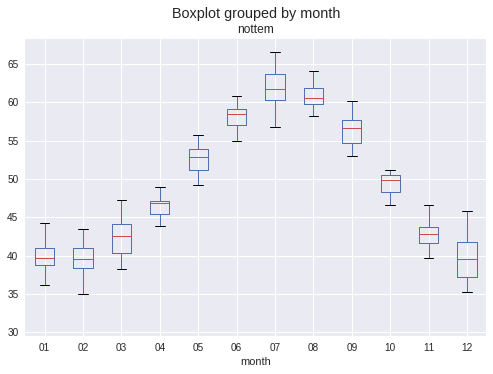

In [56]:
df.boxplot("nottem", "month")
plt.show()

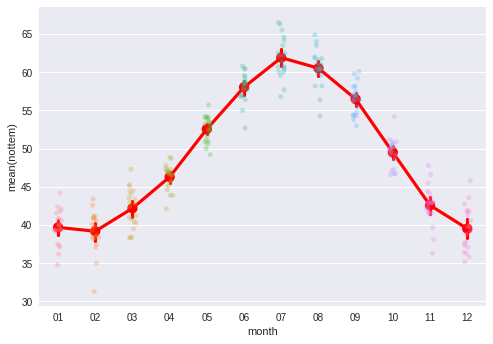

In [57]:
sns.stripplot(x="month", y="nottem", data=df, jitter=True, alpha=.3)
sns.pointplot(x="month", y="nottem", data=df, dodge=True, color='r')
plt.show()

In [65]:
model = OLS.from_formula("nottem ~ C(month) + 0", df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 nottem   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     277.3
Date:                Tue, 27 Jun 2017   Prob (F-statistic):          2.96e-125
Time:                        14:42:45   Log-Likelihood:                -535.82
No. Observations:                 240   AIC:                             1096.
Df Residuals:                     228   BIC:                             1137.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
C(month)[01]    39.6950      0.518     76.691   

coef결과는 month로 groupby한 후의 평균과 같다.

In [67]:
df.groupby("month").mean()

,time,nottem
month,,
01,1929.500000,39.695
02,1929.583333,39.190
03,1929.666667,42.195
04,1929.750000,46.290
05,1929.833333,52.560
06,1929.916667,58.040
07,1930.000000,61.900
08,1930.083333,60.520
09,1930.166667,56.480


# 분산 분석

선형회귀분석의 결과가 얼마나 좋은지는 단순히 잔차제곱합(RSS: Residula Sum of Square)으로 평가할 수 없다. 변수의 단위 즉, 스케일이 달라지면 회귀분석과 상관없이 잔차제곱합도 달라지기 때문이다.

분산 분석(ANOVA: Analysis of Variance)은 종속변수의 분산과 독립변수의 분산간의 관계를 사용하여 선형회귀분석의 성능을 평가하고자 하는 방법이다. 분산 분석은 서로 다른 두 개의 선형회귀분석의 성능 비교에 응용할 수 있으며 독립변수가 카테고리 변수인 경우 각 카테고리 값에 따른 영향을 정량적으로 분석하는데도 사용된다.

## 분산

$\bar{y}$를 종속 변수 $y$의 샘플 평균이라고 하자.

$$\bar{y}=\frac{1}{N}\sum_{i=1}^N y_i $$

종속 변수의 분산(샘플의 갯수로 나누지 않았으므로 정확하게는 분산이 아니지만 여기에서는 분산이라는 용어를 사용하자)을 나타내는 TSS(total sum of square)라는 값을 정의한다.

$$\text{TSS} = \sum_i (y_i-\bar{y})^2 = (y - \bar{y})^T(y - \bar{y} )$$

**TSS는 종속변수값의 움직임의 범위**를 나타낸다.


마찬가지로 회귀 분석에 의해 예측한 종속 변수의 분산을 나타내는 ESS(explained sum of squares),

$$\text{ESS}=\sum_i (\hat{y}_i -\bar{\hat{y}})^2 = (\hat{y} - \bar{\hat{y}})^T(\hat{y} - \bar{\hat{y}})$$

오차의 분산을 나타내는 RSS(residual sum of squares)도 정의할 수 있다.

$$\text{RSS}=\sum_i (y_i - \hat{y}_i)^2\ = e^Te$$

위 식에서 $\bar{\hat{y}}$는 모형 예측값의 평균이다.

또한 **ESS는 모형에서 나온 예측값의 움직임의 범위**, **RSS는 잔차의 움직임의 범위, 즉 오차의 크기**를 뜻한다고 볼 수 있다.

만약 회귀모형이 올바르게 정의되었다면 잔차의 평균이 0이 된다. 즉, 종속변수의 평균과 모형 예측값의 평균이 같아진다.

$$ \bar{e} = \bar{y} - \bar{\hat{y}} = 0$$

$$ \bar{y} = \bar{\hat{y}} $$

그리고 이 분산값들 간에는 다음과 같은 관계가 성립한다. 

$$\text{TSS} = \text{ESS} + \text{RSS}$$

이는 다음과 같이 증명할 수 있다.

우선 회귀 분석으로 구한 가중치 벡터를 $\hat{w}$, 독립 변수(설명 변수) $x$에 의한 종속 변수의 추정값을 $\hat{y}$, 잔차를 $e$ 라고 하면 다음 식이 성립한다.

$$ y = X\hat{w} + e = \hat{y} + e $$

따라서

$$
y - \bar{y} = \hat{y} - \bar{y} + e_i = (X- \bar{X})\hat{w} + e
$$

여기에서 $\bar{X}$는 각 열이 $X$의 해당 열의 평균인 행렬이다.


이 식에 나온 $X,\bar{X}$와 잔차 $e$는 다음과 같은 직교 관계가 성립한다. 

$$ X^Te = \bar{X}^Te = 0 $$

이 식들을 정리하면 다음과 같다.


$$
\begin{eqnarray}
\text{TSS} 
&=& (y - \bar{y})^T(y - \bar{y} ) \\
&=& (\hat{y} - \bar{y} + e)^T(\hat{y} - \bar{y} + e) \\
&=& (\hat{y} - \bar{y})^T(\hat{y} - \bar{y}) + e^Te + 2(\hat{y} - \bar{y})^Te \\
&=& (\hat{y} - \bar{y})^T(\hat{y} - \bar{y}) + e^Te + 2\hat{w}^T(X - \bar{X})^Te \\
&=& (\hat{y} - \bar{y})^T(\hat{y} - \bar{y}) + e^Te \\
&=& \text{ESS} + \text{RSS}
\end{eqnarray}
$$


위 식이 말하는 바는 다음과 같다.

> 모형 예측치의 움직임의 크기(분산)은 종속변수의 움직임의 크기(분산)보다 클 수 없다.

> 모형의 성능이 좋을수록 모형 예측치의 움직임의 크기는 종속변수의 움직임의 크기와 비슷해진다.

간단한 1차원 데이터와 모형을 사용하여 이 식이 성립하는지 살펴보자.

In [72]:
from sklearn.datasets import make_regression

X0, y, coef = make_regression(n_samples=100, n_features=1, noise=30, coef=True, random_state=0)
dfX0 = pd.DataFrame(X0, columns=["X"])
dfX = add_constant(dfX0)
dfy = pd.DataFrame(y, columns=["Y"])
df = pd.concat([dfX, dfy], axis=1)

model = OLS.from_formula("Y ~ X", data=df)
result = model.fit()

In [73]:
print("TSS = ", result.uncentered_tss)
print("ESS = ", result.mse_model)
print("RSS = ", result.ssr)
print("ESS + RSS = ", result.mse_model + result.ssr)
print("R squared = ", result.rsquared)

TSS =  291345.757898
ESS =  188589.613492
RSS =  102754.337551
ESS + RSS =  291343.951043
R squared =  0.647309178092


In [80]:
dir(result)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cache',
 '_data_attr',
 '_get_robustcov_results',
 '_is_nested',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'initialize',
 'k_constant',
 'llf',
 'load',
 'model',


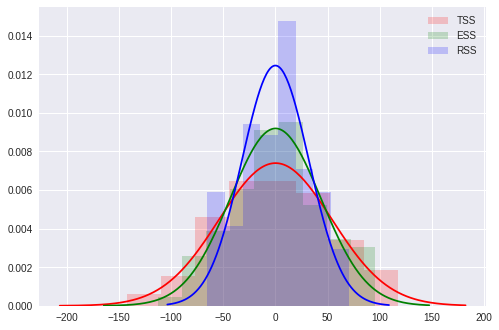

In [75]:
import scipy as sp
sns.distplot(y, 
             kde=False, fit=sp.stats.norm, hist_kws={"color": "r", "alpha": 0.2}, fit_kws={"color": "r"}, 
             label="TSS")
sns.distplot(result.fittedvalues, 
             kde=False, hist_kws={"color": "g", "alpha": 0.2}, fit=sp.stats.norm, fit_kws={"color": "g"}, 
             label="ESS")
sns.distplot(result.resid, 
             kde=False, hist_kws={"color": "b", "alpha": 0.2}, fit=sp.stats.norm, fit_kws={"color": "b"}, 
             label="RSS")
plt.legend()
plt.show()

## 결정계수(Coefficient of Determination)

위의 분산 관계식에서 모형의 성능을 나타내는 결정계수(Coefficient of Determination) $R^2$를 정의할 수 있다.

$$R^2 \equiv 1 - \dfrac{\text{RSS}}{\text{TSS}}\ = \dfrac{\text{ESS}}{\text{TSS}}\ $$

분산 관계식과 모든 분산값이 0보다 크다는 점을 이용하면 $R^2$의 값은 다음과 같은 조건을 만족함을 알 수 있다.

$$0 \leq R^2  \leq 1$$

여기에서 $R^2$가 0이라는 것은 오차의 분산 RSS가 최대이고 회귀분석 예측값의 분산 ESS가 0인 경우이므로 회귀분석 결과가 아무런 의미가 없다는 뜻이다.
반대로 $R^2$가 1이라는 것은 오차의 분산 RSS가 0이고 회귀분석 예측의 분산 ESS가 TSS와 같은 경우이므로 회귀분석 결과가 완벽하다는 뜻이다.
따라서 결정계수값은 회귀분석의 성능을 나타내는 수치라고 할 수 있다.

## 분산 분석표

분산 분석의 결과는 보통 다음과 같은 분산 분석표를 사용하여 표시한다. 아래의 표에서 $N$은 데이터의 갯수, $K$는 모수의 갯수를 뜻한다.


| source | degree of freedom | sum of square | mean square  | F test-statstics | p-value |
|-|-|-|-|-|-|
| Regression| $$K-1$$ | $$\text{ESS}$$ | $$s_{\hat{y}}^2 = \dfrac{\text{ESS}}{K-1}$$   | $$F=\dfrac{s_{\hat{y}}^2}{s_e^2} $$ | p-value |
| Residual | $$N-K$$  | $$\text{RSS}$$  | $$s_e^2= \dfrac{\text{RSS}}{N-K}$$ | |
| Total     | $$N-1$$  | $$\text{TSS}$$ | $$s_y^2= \dfrac{\text{TSS}}{N-1}$$ | |
| $R^2$   |    |  $$\text{ESS} / \text{TSS}$$ |  | |


## 회귀 분석 F-검정과 분산 분석의 관계

이러한 모양의 표를 사용하는 이유는 분산 분석의 결과를 이용하여 회귀 분석 F-검정에 필요한 검정통계량을 구할 수 있기 때문이다. 

회귀 분석 F-검정의 원래 귀무 가설은 모든 계수 $w_i$가 $0$ 이라는 것이지만 이 때는 모형이 아무런 의미가 없으므로 결정계수 값도 0이 된다 

$$ H_0: R^2 = 0 $$

이 때 다음 수식의 결과는 F 분포를 따른다. 따라서 이 값을 회귀 분석 F-검정의 검정통계량으로 사용할 수 있다.

$$ \dfrac{\text{ESS}}{K-1} \div  \dfrac{\text{RSS}}{N-K} = \dfrac{R^2/(K-1)}{(1-R^2)/(N-K)} \sim F(K-1, N-K) $$

statsmodels 에서는 다음과 같이 `anova_lm` 명령을 사용하여 분산 분석표를 출력할 수 있다. 다만 이 명령을 사용하기 위해서는 모형을 `from_formula` 메서드로 생성하여야 한다.

`anova_lm` 명령으로 구한 F 검정통계량과 유의확률은 모형 `summary` 명령으로 구한 `F-statistic` 및 `Prob (F-statistic)`과 일치한다.

In [78]:
from statsmodels.stats.anova import anova_lm
anova_lm(result)

/home/jihoon_kim/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/jihoon_kim/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/jihoon_kim/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df,sum_sq,mean_sq,F,PR(>F)
X,1.0,188589.613492,188589.613492,179.863766,6.601482e-24
Residual,98.0,102754.337551,1048.513648,NaN,NaN


In [79]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     179.9
Date:                Tue, 27 Jun 2017   Prob (F-statistic):           6.60e-24
Time:                        15:38:10   Log-Likelihood:                -488.64
No. Observations:                 100   AIC:                             981.3
Df Residuals:                      98   BIC:                             986.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.4425      3.244     -0.753      0.4

## 상수항이 없는 모형의 경우

모형에서 상수항을 지정하지 않은 경우에는 결정계수의 정의에 사용되는 TSS의 정의가 다음과 같이 달라진다.

$$\text{TSS} = \sum_i y_i^2 = y^Ty $$

즉, 실제 샘플평균과 상관없이 $\bar{y} = $이라는 가정하에 TSS를 계산한다. 이렇게 정의하지 않으면 TSS = RSS + ESS 관계식이 성립하지 않아서 결정계수의 값이 1보다 커지게 된다.

따라서 모형의 결정계수를 비교할 때 **상수항이 없는 모형과 상수항이 있는 모형은 직접 비교하면 안된다.**

In [82]:
X0, y, coef = make_regression(n_samples=100, n_features=1, noise=30, bias=100, coef=True, random_state=0)
dfX = pd.DataFrame(X0, columns=["X"])
dfy = pd.DataFrame(y, columns=["Y"])
df = pd.concat([dfX, dfy], axis=1)

model2 = OLS.from_formula("Y ~ X + 0", data=df)
result2 = model2.fit()

In [97]:
result2.rsquared

0.18768724705943896

상수항이 있는 경우와 없는 경우는 직접 비교가 불가능하다.

## F 검정을 이용한 모형 비교

F 검정을 이용하면 다음과 같이 포함관계(nesting)에 있는 두 모형의 성능을 비교할 수 있다. 

* Full Model: $$ y = w_0 + w_1 x_1 + w_2 x_2 + w_3 x_3 $$
* Reduced Model: $$ y = w_0 + w_1 x_1 $$


이 두 모형에 대해 F 검정을 실시하는 것은 다음과 같은 귀무 가설을 검정하는 것과 같다.

$$ H_0: w_2 = w_3 = 0 $$

In [85]:
from sklearn.datasets import load_boston

boston = load_boston()
dfX0_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy_boston = pd.DataFrame(boston.target, columns=["MEDV"])
dfX_boston = add_constant(dfX0_boston)
df_bosto                                                                                                                        n = pd.concat([dfX_boston, dfy_boston], axis=1)

In [87]:
model_full = OLS.from_formula("MEDV ~ CRIM + ZN + INDUS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT + CHAS", data=df_boston)
model_reduced = OLS.from_formula("MEDV ~ CRIM + ZN + NOX + RM + DIS + RAD + TAX + PTRATIO + B + LSTAT + CHAS", data=df_boston)

anova_lm(model_reduced.fit(), model_full.fit())

/home/jihoon_kim/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/jihoon_kim/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/jihoon_kim/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,494.0,11082.941389,0.0,NaN,NaN,NaN
1,492.0,11080.276284,2.0,2.665105,0.05917,0.942554


## F 검정을 사용한 변수 중요도 비교

F 검정은 각 독립변수의 중요도를 비교하기 위해 사용할 수 있다. 
방법은 전체 모형과 각 변수 하나만을 뺀 모형들의 성능을 비교하는 것이다. 이는 간접적으로 각 독립 변수의 영향력을 측정하는 것과 같다.

`anova_lm` 명령에서는 `typ=2`로 지정하여 각 모형에서의 F 검정을 계산할 수 있다.

In [88]:
model_full = OLS.from_formula("MEDV ~ CRIM + ZN + INDUS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT + CHAS", data=df_boston)
model_reduced = OLS.from_formula("MEDV ~ ZN + INDUS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT + CHAS", data=df_boston)

anova_lm(model_reduced.fit(), model_full.fit())

/home/jihoon_kim/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/jihoon_kim/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/jihoon_kim/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,493.0,11322.004277,0.0,NaN,NaN,NaN
1,492.0,11080.276284,1.0,241.727993,10.733502,0.001126


In [90]:
model_boston = OLS.from_formula("MEDV ~ CRIM + ZN + INDUS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT + CHAS", data=df_boston)
result_boston = model_boston.fit()
anova_lm(result_boston, typ=2)

,sum_sq,df,F,PR(>F)
CRIM,241.727993,1.0,10.733502,1.126402e-03
ZN,257.226157,1.0,11.421671,7.836070e-04
INDUS,2.591314,1.0,0.115063,7.345971e-01
NOX,488.605951,1.0,21.695680,4.117296e-06
RM,1865.902935,1.0,82.852108,2.207486e-18
AGE,0.072792,1.0,0.003232,9.546859e-01
DIS,1232.544417,1.0,54.728947,6.017651e-13
RAD,478.172457,1.0,21.232399,5.189664e-06
TAX,242.053549,1.0,10.747958,1.117826e-03
PTRATIO,1195.939414,1.0,53.103567,1.268218e-12


이 값은 단일 계수 t 검정의 유의확률과 동일하다. 그 이유는 다음과 같은 t 분포와 F 분포의 동치 성질 때문이다.

$$ t_n^2 = F_{(1, n)} $$

## CCPR 플롯

CCPR 플롯은 회귀 모형에서 특정한 하나의 변수의 영향을 살펴보기 위한 것이다.

다음과 같은 회귀 모형이 있다고 가정하자.

$$ y = \hat{y} + e = w_1 x_1 +  w_2 x_2 +  \cdots + w_i x_i +  \cdots +  w_K x_K + e $$

CCPR 플롯은 이 성분 중에서 

$$ w_i x_i + e $$
와
$$ y $$

를 스캐터 플롯으로 그린 것이다.

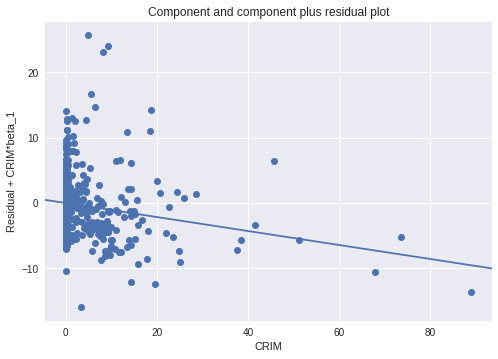

In [95]:
from statsmodels.graphics.regressionplots import plot_ccpr, plot_ccpr_grid
plot_ccpr(result_boston, "CRIM")
plt.show()

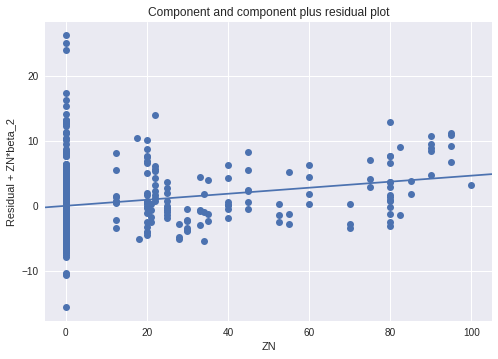

In [99]:
plot_ccpr(result_boston, "ZN")
plt.show()

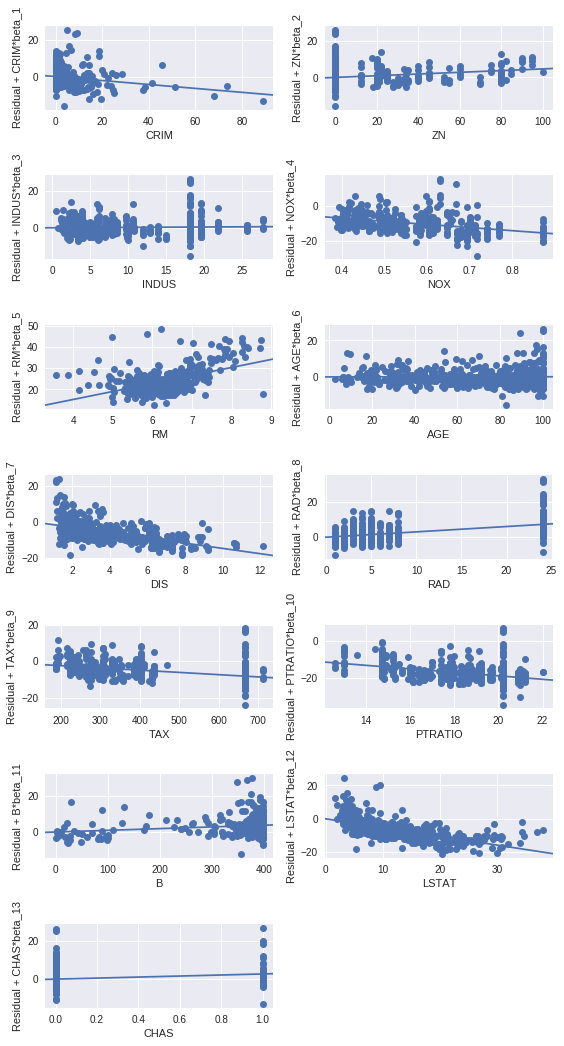

In [96]:
fig = plt.figure(figsize=(8, 15))
plot_ccpr_grid(result_boston, fig=fig)
fig.suptitle("")
plt.show()

In [236]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
columns=["X%i" % i for i in range(X.shape[1])]
X = pd.DataFrame(diabetes['data'], columns=columns)
target = pd.DataFrame(diabetes['target'], columns=['target'])

dfX = add_constant(X)
dfy = target
df_diabetes = pd.concat([dfX, dfy], axis=1)
columns.remove('X1')
columns.append('C(X1)')
x_form = "+".join(columns)
model = OLS.from_formula("target ~ " + x_form, df_diabetes)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Tue, 27 Jun 2017   Prob (F-statistic):           3.83e-62
Time:                        17:40:26   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

## 분산 분석을 이용한 카테고리 값의 영향 분석

앞에서 보았듯이 카테고리 변수는 클래스 갯수과 같은 갯수의 더미 변수로 변환된다. 따라서 더미 변수에 대해 분산 분석을 하면 각 클래스가 가지는 영향력을 계산하는 것과 같다. 

이 경우에는 분산 분석에 사용되는 각 분산의 의미가 다음과 같다. 다음은 $K$개의 복수의 카테고리 값을 가지는 경우이다.

* ESS: 각 그룹 평균의 분산 (Between-Group Variance) 
  $$ BSS = \sum_{k=1}^K (\bar{x} - \bar{x}_k)^2 $$

* RSS: 각 그룹 내의 오차의 분산의 합 (Within-Group Variance)
  $$ WSS = \sum_{k=1}^K \sum_{i} (x_{i} - \bar{x}_k)^2 $$

* TSS : 전체 오차의 분산
  $$ TSS = \sum_{i} (x_{i} - \bar{x})^2 $$

| source | degree of freedom | sum of square | mean square  | F test-statstics | p-value |
|-|-|-|-|-|-|
| Between  | $$K-1$$ | $$\text{BSS}$$ | $$s_{\hat{y}}^2 = \dfrac{\text{ESS}}{K-1}$$   | $$F=\dfrac{s_{\hat{y}}^2}{s_e^2} $$ | p-value |
| Within   | $$N-K$$  | $$\text{WSS}$$  | $$s_e^2= \dfrac{\text{RSS}}{N-K}$$ | |
| Total     | $$N-1$$  | $$\text{TSS}$$ | $$s_y^2= \dfrac{\text{TSS}}{N-1}$$ | |
| $R^2$   |    |  $$\text{BSS} / \text{TSS}$$ |  | |

이 때 F-검정의 귀무가설은 모든 더미 변수에 대한 계수가 0인 경우, 즉 클래스 구별에 따른 그룹간 분산 변화가 없는 경우이다.
즉 $\text{BSS}=0$이고 $\text{WSS}=\text{TSS}$ 이다.

보스턴 집값 자료에서 변수 `CHAS`의 영향을 분산 분석으로 알아보면 다음과 같다.

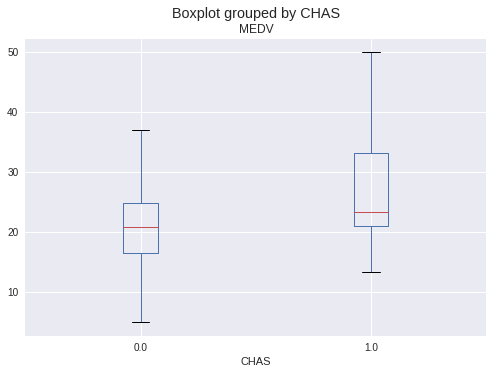

In [232]:
df_boston.boxplot("MEDV", "CHAS")
plt.show()

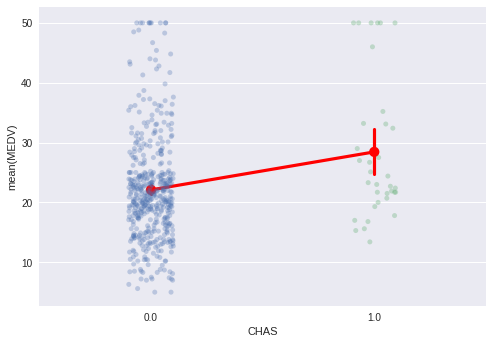

In [233]:
sns.stripplot(x="CHAS", y="MEDV", data=df_boston, jitter=True, alpha=.3)
sns.pointplot(x="CHAS", y="MEDV", data=df_boston, dodge=True, color='r')
plt.show()

In [234]:
model_chas = OLS.from_formula("MEDV ~ C(CHAS)", data=df_boston)
anova_lm(model_chas.fit())

/home/jihoon_kim/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/jihoon_kim/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/jihoon_kim/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df,sum_sq,mean_sq,F,PR(>F)
C(CHAS),1.0,1312.079271,1312.079271,15.971512,0.000074
Residual,504.0,41404.216144,82.151223,NaN,NaN


**찰스강이라는 feature가 영향이없는데 어쩌다가 영향이 있는 것처럼 나왔을 확률: 0.000074**

# 선형 회귀 모형 비교

두 개의 서로 다른 선형 회귀 모형의 성능을 비교할 때는 보통 다음과 같은 선택 기준을 사용한다.

* 조정 결정 계수 (Adjusted determination coefficient)
* AIC (Akaike Information Criterion)
* BIC (Bayesian Information Criterion) 

## 조정 결정 계수

선형 회귀 모형에서 독립 변수가 추가되면 결정 계수의 값은 항상 증가한다. 이는 다음과 같이 확인할 수 있다.

종속 변수 $y$를 회귀 분석하기 위한 기존의 독립 변수가 $X$이고 여기에 추가적인 독립 변수 $z$가 더해졌을 때, 다음과 같은 관계가 성립한다.

$$
R^2_{Xz} = R^2_{X} + (1-R^2_{X})r^{\ast 2}_{yz}
$$

여기에서 
* $R^2_{X}$: 기존의 독립 변수 $X$를 사용한 경우의 결정 계수
* $R^2_{Xz}$: 기존의 독립 변수 $X$와 추가적인 독립 변수 $z$를 모두 사용한 경우의 결정 계수
* $r^{\ast 2}_{yz}$: 추가적인 독립 변수 $z$와 종속 변수 $y$간의 상관 관계 계수


이고 이 항목들은 모두 양수이므로 

$$
R^2_{Xz} \geq R^2_{X}
$$

이러한 독립 변수 추가 효과를 상쇄시키기 위한 다양한 기준들이 제시되었다. 그 중 하나가 다음과 같이 독립 변수의 갯수 $K$에 따라 결정 계수의 값을 조정하는 조정 결정 계수이다

$$
R_{adj}^2 = 1 - \frac{n-1}{n-K}(1-R^2) = \dfrac{(n-1)R^2 +1-K}{n-K}
$$

**집어넣는만큼 좋아지게 되어있다. 유의성에 의한 향상과 헷갈릴 수 있으므로 많이 집어넣는다면 페널티를 준다고 보면 된다. 이 페널티를 주는 방식이 r스퀘어, AIC, BIC이다. $r^2$는 클수록 좋으며 loglikelihood는 클수록, aic, bic,는 작을수록 좋다. 데이터자체가 다르다면 loglikelihood는 사용할 수 없다.**

## 정보량 규준

조정 결정 계수와 함께 많이 쓰이는 모형 비교 기준은 최대 우도에 독립 변수의 갯수에 대한 손실(penalty)분을 반영하는 방법이다. 
이를 정보량 규준(information criterion)이라고 하며 손실 가중치의 계산 법에 따라 AIC (Akaike Information Criterion)와 BIC (Bayesian Information Criterion) 두 가지를 사용한다.

$$
\text{AIC} = -2\log L + 2K
$$

$$
\text{BIC} = -2\log L + K\log n
$$